In [11]:
import pandas as pd
from pycaret.classification import *

In [5]:
data = pd.read_csv('data.csv')

data.headd()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [9]:
data.shape

(333, 7)

In [14]:
model_setup = setup(data=data, target='species')

,Description,Value
0,session_id,7396
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Adelie: 0, Chinstrap: 1, Gentoo: 2"
4,Original Data,"(333, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1090
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0070
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1050
ridge,Ridge Classifier,0.9958,0.0000,0.9933,0.9962,0.9957,0.9934,0.9937,0.0070
lightgbm,Light Gradient Boosting Machine,0.9957,1.0000,0.9967,0.9964,0.9957,0.9933,0.9936,0.2470
lr,Logistic Regression,0.9915,0.9995,0.9900,0.9926,0.9914,0.9868,0.9873,0.4650
gbc,Gradient Boosting Classifier,0.9913,1.0000,0.9925,0.9924,0.9913,0.9865,0.9871,0.1570
dt,Decision Tree Classifier,0.9871,0.9900,0.9892,0.9887,0.9872,0.9801,0.9809,0.0080
nb,Naive Bayes,0.8670,0.9989,0.8967,0.9215,0.8706,0.8021,0.8250,0.0070
ada,Ada Boost Classifier,0.8199,0.8871,0.7121,0.7617,0.7626,0.6990,0.7423,0.0600


In [18]:
clf_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [20]:
clf_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7396, verbose=0,
                       warm_start=False)

In [22]:
tuned_rf = tune_model(clf_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.9970,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9565,1.0000,0.9667,0.9638,0.9574,0.9333,0.9361
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [23]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=70, n_jobs=-1, oob_score=False,
                       random_state=7396, verbose=0, warm_start=False)

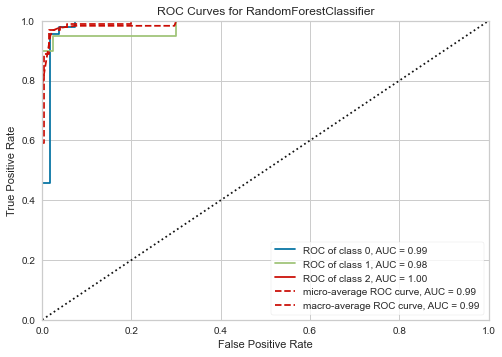

In [24]:
## AUC Plot

plot_model(tuned_rf, plot = 'auc')

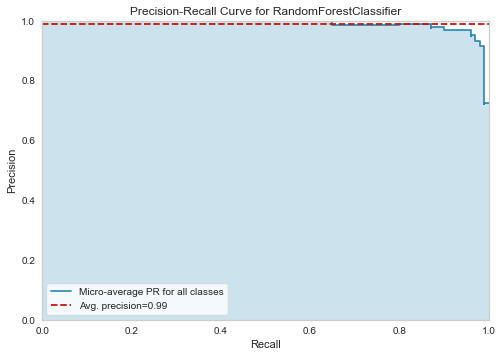

In [25]:
## Precision-recall curve

plot_model(tuned_rf, plot = 'pr')

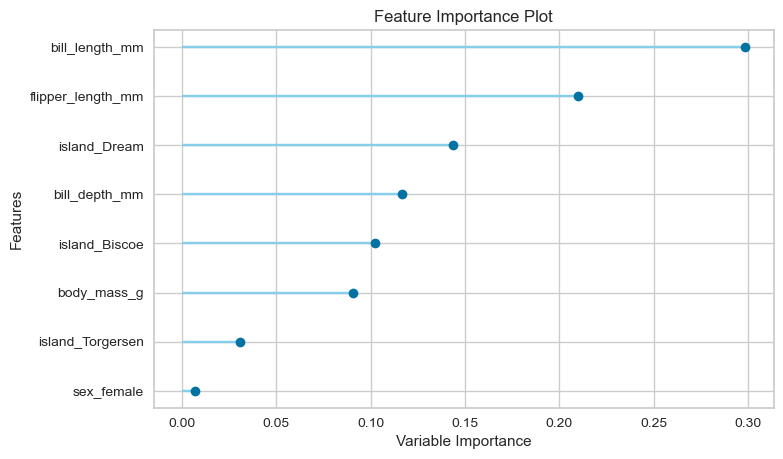

In [26]:
## feature importance

plot_model(tuned_rf, plot='feature')

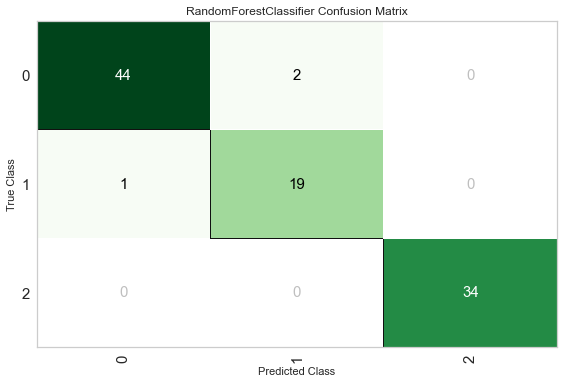

In [27]:
## Consufion matrix

plot_model(tuned_rf, plot = 'confusion_matrix')

In [29]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [31]:
final_rf = finalize_model(tuned_rf)

final_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=70, n_jobs=-1, oob_score=False,
                       random_state=7396, verbose=0, warm_start=False)

In [32]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9700,0.9992,0.9688,0.9707,0.9702,0.9528,0.9529


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,species,Label,Score
0,44.400002,17.299999,219.0,5250.0,1.0,0.0,0.0,0.0,Gentoo,Gentoo,0.8437
1,49.700001,18.600000,195.0,3600.0,0.0,1.0,0.0,0.0,Chinstrap,Chinstrap,0.9406
2,45.500000,14.500000,212.0,4750.0,1.0,0.0,0.0,1.0,Gentoo,Gentoo,0.9944
3,43.599998,13.900000,217.0,4900.0,1.0,0.0,0.0,1.0,Gentoo,Gentoo,0.9944
4,59.599998,17.000000,230.0,6050.0,1.0,0.0,0.0,0.0,Gentoo,Gentoo,0.9767
...,...,...,...,...,...,...,...,...,...,...,...
95,38.099998,17.600000,187.0,3425.0,0.0,1.0,0.0,1.0,Adelie,Adelie,0.8315
96,40.900002,13.700000,214.0,4650.0,1.0,0.0,0.0,1.0,Gentoo,Gentoo,0.7477
97,46.900002,16.600000,192.0,2700.0,0.0,1.0,0.0,1.0,Chinstrap,Chinstrap,0.9066
98,50.000000,15.300000,220.0,5550.0,1.0,0.0,0.0,0.0,Gentoo,Gentoo,0.9944


In [62]:
save_model(final_rf, 'Final_RF_Model_14Aug2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=6,
                                         max_featur

In [71]:
df = {'island': "Torgersen",'bill_length_mm':39.1, 'bill_depth_mm':18.7, 'flipper_length_mm':181, 'body_mass_g':3750, 'sex':"female"}
df=pd.DataFrame(data=df, index=[0])

In [65]:
saved_final_rf = load_model('Final RF Model 14Aug2021')

Transformation Pipeline and Model Successfully Loaded


In [79]:
predict_model(saved_final_rf, data=df)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Label,Score
0,Torgersen,39.1,18.7,181,3750,female,Adelie,0.9916


In [58]:
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181,3750,male


In [68]:
import joblib
model = joblib.load(open('Final_RF_Model_14Aug2021.pkl', 'rb'))

In [81]:
pr = model.predict(df)

penguins_species = np.array(['Adelie','Chinstrap','Gentoo'])

print(penguins_species[pr])

['Adelie']
